In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('brain_stroke.csv')

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,1,1,1,228.69,36.6,1,1
1,Male,80,0,1,1,1,0,105.92,32.5,2,1
2,Female,49,0,0,1,1,1,171.23,34.4,3,1
3,Female,79,1,0,1,2,0,174.12,24.0,2,1
4,Male,81,0,0,1,1,1,186.21,29.0,1,1


In [5]:
le = LabelEncoder()

In [13]:
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['gender'] = le.fit_transform(df['gender'])
df['age'] = df['age'].astype(int)

In [14]:
X = df.drop('stroke', axis = 'columns')
y = df.stroke

In [15]:
scaler = StandardScaler()
X_normalize = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_normalize,y, test_size = 0.2, random_state = 42)

In [17]:
rf = RandomForestClassifier(max_depth = 5, max_features = 'sqrt', n_estimators = 100)

In [18]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9458375125376128

In [19]:
y_preds = rf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm

array([[943,   0],
       [ 54,   0]])

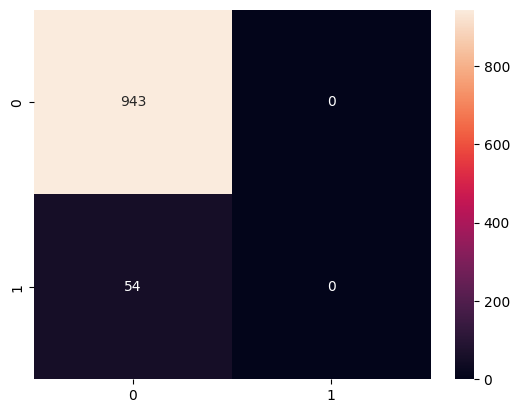

In [20]:
sns.heatmap(cm, annot = True, fmt = 'g');

In [22]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
